# Compare IMS and HLS across subfishnet (10 x 10 km)
- First 3x3 HBL, then HBL, then Canada?

## Setup

In [1]:
#from dask.distributed import LocalCluster
import geopandas as gpd
import rioxarray as rxr
import xvec
import matplotlib.pyplot as plt
import numpy as np
#from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score
from exactextract import exact_extract
# from osgeo import ogr, gdal

# gdal.UseExceptions()
# ogr.UseExceptions()

import sys
sys.path.append('C:/Users/mbonney/OneDrive - NRCan RNCan/Projects/UtilityCode/Visualization/Utilities')
import Viz_Utils as vutil

In [2]:
# cluster = LocalCluster(n_workers = 10, threads_per_worker = 10) # Refined through testing
# client = cluster.get_client()
# client # Can open in other window by clicking 'Dashboard' link below

In [3]:
# #tile_list = [828, 829, 830, 904, 905, 906, 988, 989, 990] # For 3x3 test area only
# tile_list = gpd.read_file(r'C:\Users\mbonney\OneDrive - NRCan RNCan\Projects\Canada\Tiling\TileSytems\60km\canadaFishnet_CanVec_60km.shp')
# tile_list = tile_list[tile_list['HBL'] == 1].index.tolist()
# #tile_list # All HBL tiles

In [4]:
#fishnet = gpd.read_file(r"C:\Users\mbonney\OneDrive - NRCan RNCan\Projects\HBL\TemporalSnow\AA\Regional Snow Dynamics\canadaFishnet_60km_sub10km_clip.shp")
fishnet = gpd.read_file(r"C:\Users\mbonney\OneDrive - NRCan RNCan\Projects\High Resolution Snow Dynamics\Fmask_V1\AA\Regional Snow Dynamics\canadaFishnet_60km_sub10km_HBLclip.shp")
#fishnet = fishnet[fishnet['ID'].isin(tile_list)] # HBL3x3
fishnet

,ID,ID_sub,geometry
0,365,16,"POLYGON ((638171.882 201462.446, 636878.257 20..."
1,365,17,"POLYGON ((648972.823 196065.864, 648630.883 19..."
2,365,22,"POLYGON ((635722.827 205276.489, 635792.132 20..."
3,365,23,"POLYGON ((638972.823 205276.489, 638972.823 21..."
4,365,28,"POLYGON ((638714.128 215276.489, 638972.823 21..."
...,...,...,...
4316,1544,8,"MULTIPOLYGON (((68972.823 1085276.489, 68972.8..."
4317,1544,9,"POLYGON ((78972.823 1085276.489, 78972.823 108..."
4318,1544,10,"POLYGON ((92842.641 1085276.489, 93214.728 108..."
4319,1544,11,"POLYGON ((98972.823 1085276.489, 98972.823 108..."


In [5]:
#fishnet.crs

In [6]:
ims = rxr.open_rasterio(r"C:\Users\mbonney\OneDrive - NRCan RNCan\Projects\High Resolution Snow Dynamics\Fmask_V1\AA\Regional Snow Dynamics\IMS\interannual\IMS_snow_length_mn_1823_HBL.tif", masked = True)
#ims = rxr.open_rasterio(r"C:\Users\mbonney\OneDrive - NRCan RNCan\Projects\High Resolution Snow Dynamics\Fmask_V1\AA\Regional Snow Dynamics\IMS\winterYear\2018-2019\IMS_snow_length_winterYear1819_HBL.tif", masked = True)
#ims = rxr.open_rasterio(r"C:\Users\mbonney\OneDrive - NRCan RNCan\Projects\High Resolution Snow Dynamics\Fmask_V1\AA\Regional Snow Dynamics\IMS\winterYear\2019-2020\IMS_snow_length_winterYear1920_HBL.tif", masked = True)
#ims = rxr.open_rasterio(r"C:\Users\mbonney\OneDrive - NRCan RNCan\Projects\High Resolution Snow Dynamics\Fmask_V1\AA\Regional Snow Dynamics\IMS\winterYear\2020-2021\IMS_snow_length_winterYear2021_HBL.tif", masked = True)
#ims = rxr.open_rasterio(r"C:\Users\mbonney\OneDrive - NRCan RNCan\Projects\High Resolution Snow Dynamics\Fmask_V1\AA\Regional Snow Dynamics\IMS\winterYear\2021-2022\IMS_snow_length_winterYear2122_HBL.tif", masked = True)
#ims = rxr.open_rasterio(r"C:\Users\mbonney\OneDrive - NRCan RNCan\Projects\High Resolution Snow Dynamics\Fmask_V1\AA\Regional Snow Dynamics\IMS\winterYear\2022-2023\IMS_snow_length_winterYear2223_HBL.tif", masked = True)
ims

<xarray.DataArray (band: 1, y: 933, x: 1318)> Size: 5MB
[1229694 values with dtype=float32]
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 11kB -4.551e+04 -4.451e+04 ... 1.27e+06 1.271e+06
  * y            (y) float64 7kB 1.109e+06 1.108e+06 ... 1.781e+05 1.771e+05
    spatial_ref  int64 8B 0
Attributes: (12/13)
    long_name:               snow_length_mn
    STATISTICS_COUNT:        393876.0
    STATISTICS_COVARIANCES:  95.80830768565905
    STATISTICS_MAXIMUM:      250.39999389648
    STATISTICS_MEAN:         194.86461172927
    STATISTICS_MEDIAN:       193.861958
    ...                      ...
    STATISTICS_SKIPFACTORX:  1
    STATISTICS_SKIPFACTORY:  1
    STATISTICS_STDDEV:       9.7881718255075
    AREA_OR_POINT:           Area
    scale_factor:            1.0
    add_offset:              0.0

In [7]:
#ims.rio.crs

In [8]:
#ims.plot()

In [9]:
hls = rxr.open_rasterio(r"F:\HLS\HBL\Products\SnowDynamics\interannual\length\weighted_mean\HLS_Fmask_snow_length_mn_1823_HBL.tif", masked = True)
#hls = rxr.open_rasterio(r"F:\HLS\HBL\Products\SnowDynamics\interannual\length\best_value\HLS_Fmask_snow_length_bv_1823_HBL.tif", masked = True)
#hls = rxr.open_rasterio(r"F:\HLS\HBL\Products\SnowDynamics\winterYear\1819\length\HLS_Fmask_snow_length_winterYear1819_HBL.tif", masked = True)
#hls = rxr.open_rasterio(r"F:\HLS\HBL\Products\SnowDynamics\winterYear\1920\length\HLS_Fmask_snow_length_winterYear1920_HBL.tif", masked = True)
#hls = rxr.open_rasterio(r"F:\HLS\HBL\Products\SnowDynamics\winterYear\2021\length\HLS_Fmask_snow_length_winterYear2021_HBL.tif", masked = True)
#hls = rxr.open_rasterio(r"F:\HLS\HBL\Products\SnowDynamics\winterYear\2122\length\HLS_Fmask_snow_length_winterYear2122_HBL.tif", masked = True)
#hls = rxr.open_rasterio(r"F:\HLS\HBL\Products\SnowDynamics\winterYear\2223\length\HLS_Fmask_snow_length_winterYear2223_HBL.tif", masked = True)
hls

<xarray.DataArray (band: 1, y: 32000, x: 46000)> Size: 6GB
[1472000000 values with dtype=float32]
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 368kB -7.102e+04 -7.1e+04 ... 1.309e+06 1.309e+06
  * y            (y) float64 256kB 1.135e+06 1.135e+06 ... 1.753e+05 1.753e+05
    spatial_ref  int64 8B 0
Attributes: (12/13)
    AREA_OR_POINT:           Area
    STATISTICS_COUNT:        437642537.0
    STATISTICS_COVARIANCES:  172.3555255485566
    STATISTICS_MAXIMUM:      306.82363891602
    STATISTICS_MEAN:         192.33387721626
    STATISTICS_MEDIAN:       191.313563
    ...                      ...
    STATISTICS_SKIPFACTORX:  1
    STATISTICS_SKIPFACTORY:  1
    STATISTICS_STDDEV:       13.128424336094
    scale_factor:            1.0
    add_offset:              0.0
    long_name:               snow_length_mn

In [10]:
hls_q = rxr.open_rasterio(r"F:\HLS\HBL\Products\SnowDynamics\interannual\length\weighted_mean\HLS_Fmask_snow_length_q_mn_1823_HBL.tif", masked = True)
#hls_q = rxr.open_rasterio(r"F:\HLS\HBL\Products\SnowDynamics\interannual\length\best_value\HLS_Fmask_snow_length_bvq_1823_HBL.tif", masked = True)
#hls_q = rxr.open_rasterio(r"F:\HLS\HBL\Products\SnowDynamics\winterYear\1819\length\HLS_Fmask_snow_length_u_winterYear1819_HBL.tif", masked = True)
#hls_q = rxr.open_rasterio(r"F:\HLS\HBL\Products\SnowDynamics\winterYear\1920\length\HLS_Fmask_snow_length_u_winterYear1920_HBL.tif", masked = True)
#hls_q = rxr.open_rasterio(r"F:\HLS\HBL\Products\SnowDynamics\winterYear\2021\length\HLS_Fmask_snow_length_u_winterYear2021_HBL.tif", masked = True)
#hls_q = rxr.open_rasterio(r"F:\HLS\HBL\Products\SnowDynamics\winterYear\2122\length\HLS_Fmask_snow_length_u_winterYear2122_HBL.tif", masked = True)
#hls_q = rxr.open_rasterio(r"F:\HLS\HBL\Products\SnowDynamics\winterYear\2223\length\HLS_Fmask_snow_length_u_winterYear2223_HBL.tif", masked = True)
hls_q

<xarray.DataArray (band: 1, y: 32000, x: 46000)> Size: 6GB
[1472000000 values with dtype=float32]
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 368kB -7.102e+04 -7.1e+04 ... 1.309e+06 1.309e+06
  * y            (y) float64 256kB 1.135e+06 1.135e+06 ... 1.753e+05 1.753e+05
    spatial_ref  int64 8B 0
Attributes: (12/13)
    AREA_OR_POINT:           Area
    STATISTICS_COUNT:        437642537.0
    STATISTICS_COVARIANCES:  0.003163535882392479
    STATISTICS_MAXIMUM:      0.94070082902908
    STATISTICS_MEAN:         0.73581757784856
    STATISTICS_MEDIAN:       0.742377
    ...                      ...
    STATISTICS_SKIPFACTORX:  1
    STATISTICS_SKIPFACTORY:  1
    STATISTICS_STDDEV:       0.056245318759809
    scale_factor:            1.0
    add_offset:              0.0
    long_name:               snow_length_q_mn

In [11]:
#hls.rio.crs

In [12]:
#hls.plot()

## For each square, get mean value and pixel count

In [13]:
%%time
ims_stats = exact_extract(ims, fishnet, ['mean', 'count'], include_geom = True, output = 'pandas', progress = True)
ims_stats

# 35 seconds (but can actually be completed for HLS outputs, and more exact)

C:\Users\mbonney\Miniforge3\envs\snow_hls_2025\Lib\site-packages\exactextract\exact_extract.py:330: RuntimeWarning: Spatial reference system of input features does not exactly match raster.
  warnings.warn(
.: 100%|███████████████████████████████████████████████████████████████████████████| 100.0/100 [00:39<00:00,  2.52it/s]


CPU times: total: 24.6 s
Wall time: 39.7 s


,mean,count,geometry
0,188.399994,10.484036,"POLYGON ((638171.882 201462.446, 636878.257 20..."
1,187.729597,49.031225,"POLYGON ((648972.823 196065.864, 648630.883 19..."
2,188.399994,17.743717,"POLYGON ((635722.827 205276.489, 635792.132 20..."
3,188.032327,99.989182,"POLYGON ((638972.823 205276.489, 638972.823 21..."
4,NaN,0.000000,"POLYGON ((638714.128 215276.489, 638972.823 21..."
...,...,...,...
4316,215.608471,2.971585,"MULTIPOLYGON (((68972.823 1085276.489, 68972.8..."
4317,214.530787,2.001660,"POLYGON ((78972.823 1085276.489, 78972.823 108..."
4318,216.424575,3.823005,"POLYGON ((92842.641 1085276.489, 93214.728 108..."
4319,216.036092,0.795929,"POLYGON ((98972.823 1085276.489, 98972.823 108..."


In [14]:
ims_stats[ims_stats['count'] == 0]

,mean,count,geometry
4,NaN,0.0,"POLYGON ((638714.128 215276.489, 638972.823 21..."
6,NaN,0.0,"POLYGON ((638972.823 227294.085, 638568.82 228..."
750,NaN,0.0,"POLYGON ((578972.823 378674.75, 578906.193 378..."
1479,NaN,0.0,"POLYGON ((528972.823 494314.01, 528945.753 494..."
1741,NaN,0.0,"POLYGON ((1008972.823 510834.776, 1008917.759 ..."
1743,NaN,0.0,"POLYGON ((1008717.834 515276.489, 1008718.194 ..."
2192,NaN,0.0,"POLYGON ((958972.823 593303.15, 958911.271 593..."
2617,NaN,0.0,"POLYGON ((958915.244 595276.489, 958972.823 59..."
2637,NaN,0.0,"POLYGON ((1008972.823 645130.04, 1008894.544 6..."
3759,NaN,0.0,"POLYGON ((38876.518 865276.489, 38895.881 8653..."


In [15]:
#Some IMS squares have 0, so lets filter fishnet and ims_stats
fishnet = fishnet[ims_stats['count'] > 0].reset_index()
ims_stats = ims_stats[ims_stats['count'] > 0].reset_index()

In [16]:
ims_stats # And reset index for ordering later

,index,mean,count,geometry
0,0,188.399994,10.484036,"POLYGON ((638171.882 201462.446, 636878.257 20..."
1,1,187.729597,49.031225,"POLYGON ((648972.823 196065.864, 648630.883 19..."
2,2,188.399994,17.743717,"POLYGON ((635722.827 205276.489, 635792.132 20..."
3,3,188.032327,99.989182,"POLYGON ((638972.823 205276.489, 638972.823 21..."
4,5,188.224655,91.463957,"POLYGON ((638972.823 215276.489, 638972.823 21..."
...,...,...,...,...
4306,4316,215.608471,2.971585,"MULTIPOLYGON (((68972.823 1085276.489, 68972.8..."
4307,4317,214.530787,2.001660,"POLYGON ((78972.823 1085276.489, 78972.823 108..."
4308,4318,216.424575,3.823005,"POLYGON ((92842.641 1085276.489, 93214.728 108..."
4309,4319,216.036092,0.795929,"POLYGON ((98972.823 1085276.489, 98972.823 108..."


In [17]:
# %%time
# ims_stats = ims.xvec.zonal_stats(fishnet.geometry, 'x', 'y', stats = ['mean', 'count'], index = True, method = 'rasterize', all_touched = False)
# ims_stats = ims_stats.xvec.to_geodataframe(name = 'ims', long = False)
# ims_stats = ims_stats.sort_index(axis = 1).drop(['spatial_ref', 'index'], axis = 1)
# ims_stats.columns = ims_stats.columns.droplevel(2)
# ims_stats

# rasterize, no LocalCluster: 6 seconds (HBL)
# exactextract, no LocalCluster: Not on conda-forge yet for windows (https://github.com/conda-forge/exactextract-feedstock/issues/17)
# rasterize, LocalCluster: 15 seconds (HBL)
# exactextract, LocalCluster: Not on conda-forge yet for windows (https://github.com/conda-forge/exactextract-feedstock/issues/17)

In [18]:
#ims_stats['ims']['count'].hist()
#ims_stats['count'].hist()

In [19]:
#ims_stats['ims']['mean'].hist()
#ims_stats['mean'].hist()

In [20]:
%%time
hls_stats = exact_extract(hls, fishnet, ['mean', 'count'], include_geom = True, output = 'pandas', progress = True)
hls_stats

C:\Users\mbonney\Miniforge3\envs\snow_hls_2025\Lib\site-packages\exactextract\exact_extract.py:330: RuntimeWarning: Spatial reference system of input features does not exactly match raster.
  warnings.warn(
.: 100%|███████████████████████████████████████████████████████████████████████████| 100.0/100 [01:38<00:00,  1.02it/s]

CPU times: total: 52.7 s
Wall time: 1min 38s


,mean,count,geometry
0,182.795401,12444.104406,"POLYGON ((638171.882 201462.446, 636878.257 20..."
1,180.026847,55495.216324,"POLYGON ((648972.823 196065.864, 648630.883 19..."
2,181.592201,21045.095058,"POLYGON ((635722.827 205276.489, 635792.132 20..."
3,180.830813,111111.111108,"POLYGON ((638972.823 205276.489, 638972.823 21..."
4,183.055340,102482.345897,"POLYGON ((638972.823 215276.489, 638972.823 21..."
...,...,...,...
4306,191.112183,4130.349849,"MULTIPOLYGON (((68972.823 1085276.489, 68972.8..."
4307,186.664707,3096.946954,"POLYGON ((78972.823 1085276.489, 78972.823 108..."
4308,183.379091,5079.943104,"POLYGON ((92842.641 1085276.489, 93214.728 108..."
4309,183.726180,1445.464026,"POLYGON ((98972.823 1085276.489, 98972.823 108..."


In [21]:
hls_stats[hls_stats['count'] == 0]

,mean,count,geometry


In [22]:
# %%time
# #hls_stats = hls.xvec.zonal_stats(fishnet.geometry, 'x', 'y', stats = ['mean', 'count'], index = True, method = 'rasterize', all_touched = False)
# hls_stats = hls.xvec.zonal_stats(fishnet.iloc[0:2].geometry, 'x', 'y', stats = ['mean', 'count'], index = True, method = 'rasterize', all_touched = False)
# hls_stats = hls_stats.xvec.to_geodataframe(name = 'hls', long = False)
# hls_stats = hls_stats.sort_index(axis = 1).drop(['spatial_ref', 'index'], axis = 1)
# hls_stats.columns = hls_stats.columns.droplevel(2)
# hls_stats

# rasterize, no LocalCluster: Cannot get to run (runs for a long time, then memory issues)
# rasterize, LocalCluster: Cannot get to run (runs for a long time, then memory issues)

In [23]:
#hls_stats['hls']['count'].hist()
#hls_stats['count'].hist()

In [24]:
#hls_stats['hls']['mean'].hist()
#hls_stats['mean'].hist()

In [25]:
%%time
hls_q_stats = exact_extract(hls_q, fishnet, ['mean'], include_geom = True, output = 'pandas', progress = True)
hls_q_stats

C:\Users\mbonney\Miniforge3\envs\snow_hls_2025\Lib\site-packages\exactextract\exact_extract.py:330: RuntimeWarning: Spatial reference system of input features does not exactly match raster.
  warnings.warn(
.: 100%|███████████████████████████████████████████████████████████████████████████| 100.0/100 [01:42<00:00,  1.03s/it]


CPU times: total: 52.8 s
Wall time: 1min 42s


,mean,geometry
0,0.740654,"POLYGON ((638171.882 201462.446, 636878.257 20..."
1,0.763864,"POLYGON ((648972.823 196065.864, 648630.883 19..."
2,0.748684,"POLYGON ((635722.827 205276.489, 635792.132 20..."
3,0.757663,"POLYGON ((638972.823 205276.489, 638972.823 21..."
4,0.742441,"POLYGON ((638972.823 215276.489, 638972.823 21..."
...,...,...
4306,0.559529,"MULTIPOLYGON (((68972.823 1085276.489, 68972.8..."
4307,0.540825,"POLYGON ((78972.823 1085276.489, 78972.823 108..."
4308,0.519116,"POLYGON ((92842.641 1085276.489, 93214.728 108..."
4309,0.527817,"POLYGON ((98972.823 1085276.489, 98972.823 108..."


In [26]:
# %%time
# hls_q_stats = hls_q.xvec.zonal_stats(fishnet.geometry, 'x', 'y', stats = ['mean'], index = True, method = 'rasterize', all_touched = False)
# hls_q_stats = hls_q_stats.xvec.to_geodataframe(name = 'hls_q', long = False)
# hls_q_stats = hls_q_stats.sort_index(axis = 1).drop(['spatial_ref', 'index'], axis = 1)
# hls_q_stats.columns = hls_q_stats.columns.droplevel(2)
# hls_q_stats

In [27]:
#hls_q_stats['hls_q']['mean'].hist()
#hls_q_stats['mean'].hist()

# Plot

In [28]:
# # Drop fishnet squares with no IMS coverage
# hls_stats = hls_stats[ims_stats['count'] > 0]
# hls_q_stats = hls_q_stats[ims_stats['count'] > 0]
# ims_stats = ims_stats[ims_stats['count'] > 0]
# print(len(hls_stats))
# print(len(hls_q_stats))
# print(len(ims_stats))

In [43]:
#hls = hls_stats['hls']['mean'] # x
hls = hls_stats['mean']
#ims = ims_stats['ims']['mean'] # y
ims = ims_stats['mean']
#weights = (hls_stats['hls']['count'] / hls_stats['hls']['count'].max()) * (ims_stats['ims']['count'] / ims_stats['ims']['count'].max())
weights = (hls_stats['count'] / hls_stats['count'].max()) * (ims_stats['count'] / ims_stats['count'].max())
# Weights = sample size normalized across HLS and IMS
#hls_q = hls_q_stats['hls_q']['mean'] # Quality metric for HLS
hls_q = hls_q_stats['mean']
q_range = [0.5, 1] #[0.5, 1] # [0, 30]

label = 'Snow Length'

xlabel = 'Snow Length (HLS)'
ylabel = 'Snow Length (IMS)'
qlabel = 'Quality' #'Uncertainty (Days)' #'Quality'

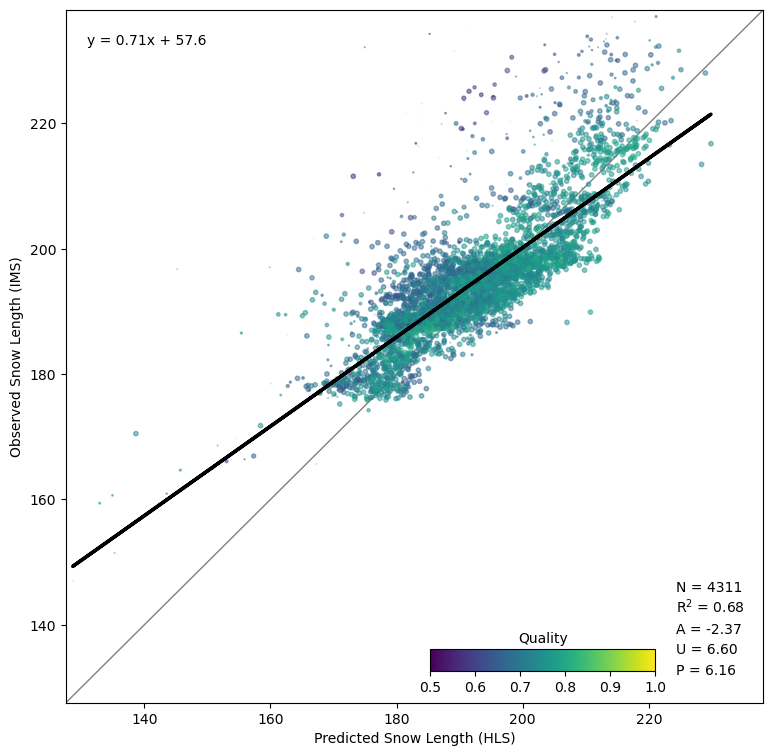

In [44]:
vutil.ObsPredPlot(pred = hls, obs = ims, weights = weights, quality = hls_q, q_range = q_range, 
                  pred_label = label + ' (HLS)', obs_label = label + ' (IMS)', q_label = qlabel, alpha = 0.5, w_size = 10)

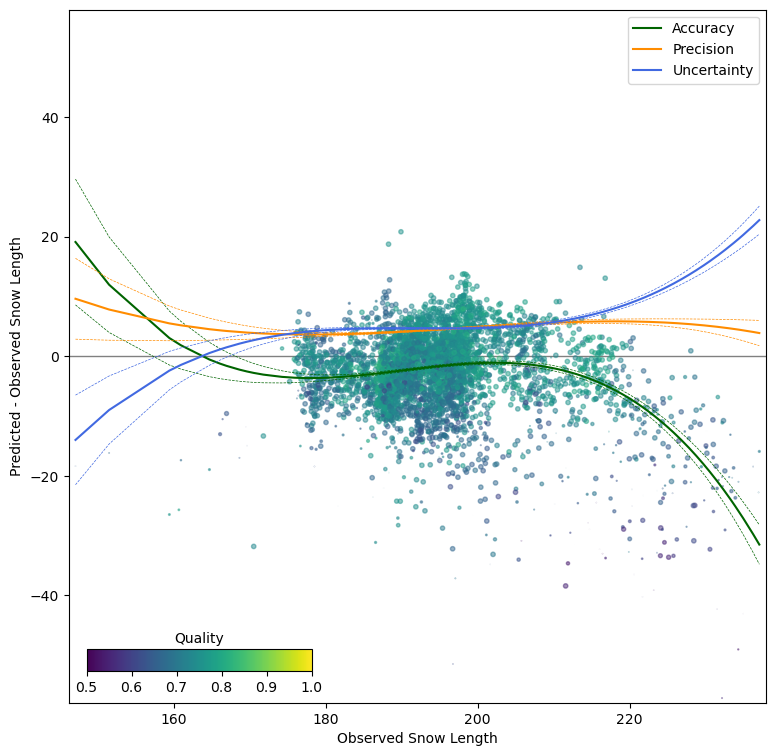

In [45]:
vutil.APUcurves(pred = hls, obs = ims, weights = weights, quality = hls_q, q_range = q_range, label = label, q_label = qlabel, alpha = 0.5, w_size = 10)

# Map Residuals (predicted HLS vs observed IMS)
- Need to update Residual vs Uncertaitny Correlation to be absolute

In [32]:
fishnet['res'] = hls_stats['mean'] - ims_stats['mean']
fishnet['qual'] = hls_q_stats['mean']
fishnet

,index,ID,ID_sub,geometry,res,qual
0,0,365,16,"POLYGON ((638171.882 201462.446, 636878.257 20...",-5.604593,0.740654
1,1,365,17,"POLYGON ((648972.823 196065.864, 648630.883 19...",-7.702750,0.763864
2,2,365,22,"POLYGON ((635722.827 205276.489, 635792.132 20...",-6.807793,0.748684
3,3,365,23,"POLYGON ((638972.823 205276.489, 638972.823 21...",-7.201515,0.757663
4,5,365,29,"POLYGON ((638972.823 215276.489, 638972.823 21...",-5.169315,0.742441
...,...,...,...,...,...,...
4306,4316,1544,8,"MULTIPOLYGON (((68972.823 1085276.489, 68972.8...",-24.496288,0.559529
4307,4317,1544,9,"POLYGON ((78972.823 1085276.489, 78972.823 108...",-27.866080,0.540825
4308,4318,1544,10,"POLYGON ((92842.641 1085276.489, 93214.728 108...",-33.045484,0.519116
4309,4319,1544,11,"POLYGON ((98972.823 1085276.489, 98972.823 108...",-32.309912,0.527817


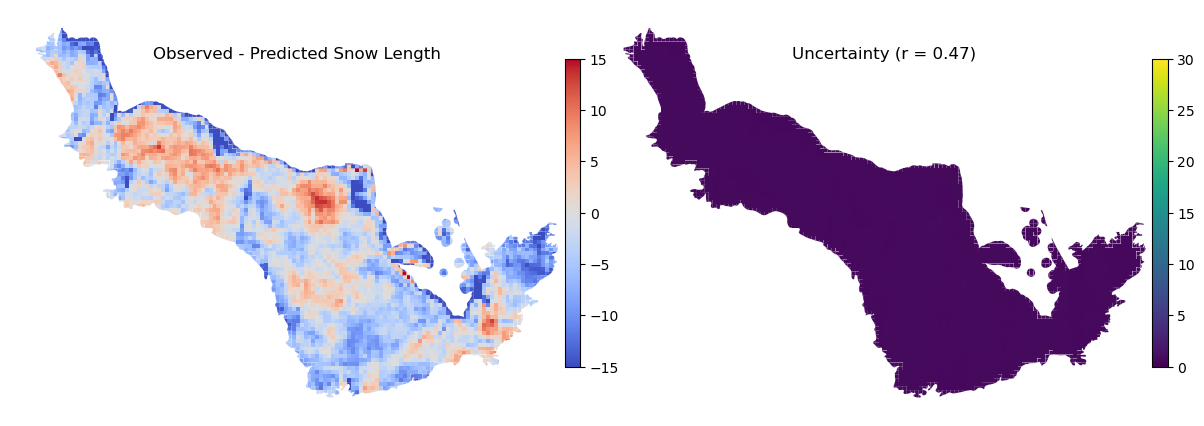

In [33]:
fig, axs = plt.subplots(1, 2, figsize = (16, 8))
fishnet.plot(ax = axs[0], column = 'res', cmap = 'coolwarm', vmin = -15, vmax = 15, legend = True, legend_kwds = {'shrink': 0.5, 'pad': -0.03})
fishnet.plot(ax = axs[1], column = 'qual', vmin = 0, vmax = 30, legend = True, legend_kwds = {'shrink': 0.5, 'pad': -0.03}) # vmin = 0.5/0, vmax = 1/15

r = fishnet['res'].corr(fishnet['qual'])

axs[0].set_axis_off()
axs[0].set_title('Observed - Predicted Snow Length', y = 1, pad = -35)
axs[1].set_axis_off()
axs[1].set_title(f'Uncertainty (r = {r:.2f})', y = 1, pad = -35) # Quality

fig.subplots_adjust(wspace = -0.1, hspace = 0)
plt.show()

# Testing

In [34]:
# Observed vs Predicted:
# See Pineiro et al., 2008; Greaves et al., 2016; 
# Better? Fernandes et al., 2024; Doxani et al., 2023
# https://github.com/rfernand387/LEAF-Toolbox/blob/master/Papers/SL2PValidation/Validation-LEAF-Toolbox-SL2P-Paper.ipynb

In [35]:
# fig, ax = plt.subplots(figsize=(9, 9))

# # Scatterplot
# plt.scatter(hls, ims, weights * 50, alpha = 0.5)

# # Regression line
# slope, intercept = np.polyfit(hls, ims, deg = 1, w = weights)
# xseq = np.linspace(pmin, pmax, num = 2)
# ax.plot(xseq, intercept + slope * xseq, color = "k", lw = 2.5)

# # 1-1 line
# ax.plot(xseq, xseq, color = "gray", lw = 1)

# # Regression equation
# equ_spot = (pmin + ((pmax - pmin) * 0.04), pmin + ((pmax - pmin) * 0.95))
# if intercept < 0: 
#     plt.annotate('y ={0: .2f}x -{1: .1f}'.format(slope, abs(intercept)), xy = equ_spot)
# if intercept >= 0:
#     plt.annotate('y ={0: .2f}x +{1: .1f}'.format(slope, intercept), xy = equ_spot)

# # R2
# r2_spot = (pmin + ((pmax - pmin) * 0.04), pmin + ((pmax - pmin) * 0.925))
# plt.annotate('R\u00b2 = {:.2f}'.format(r2_score(hls, ims, sample_weight = weights)), xy = r2_spot)

# # RMSE
# rmse_spot = (pmin + ((pmax - pmin) * 0.04), pmin + ((pmax - pmin) * 0.9))
# plt.annotate('RMSE = {:.1f}'.format(root_mean_squared_error(hls, ims, sample_weight = weights)), xy = rmse_spot)

# # X axis
# plt.xlim(pmin, pmax)
# plt.xlabel('HLS-based Snow End Date')

# # Y axis
# plt.ylim(pmin, pmax)
# plt.ylabel('IMS-based Snow End Date')

# plt.show()

In [36]:
# Bias = mean of residuals


# (ims - y_pred[:, 0]).mean()

In [37]:
# fig, ax = plt.subplots(figsize=(9, 9))

# plt.scatter(hls, ims, weights * 50, alpha = 0.5)

# lm = linear_model.LinearRegression() 
# lm.fit(hls.to_frame(), ims.to_frame(), sample_weight = weights) # Fit linear model
# y_pred = lm.predict(hls.to_frame()) # Predict y using x

# ax.plot(hls, y_pred, color = 'k', lw = 2.5) # Plot regression line
# plt.axline((pmin,pmin), (pmax, pmax), color = "gray", lw = 1) # Plot 1-1 line

# # Regression equation
# equ_spot = (pmin + ((pmax - pmin) * 0.04), pmin + ((pmax - pmin) * 0.95))
# plt.annotate('y ={0: .2f}x -{1: .1f}'.format(lm.coef_[0][0], abs(lm.intercept_[0])), xy = equ_spot)

# # R2
# r2_spot = (pmin + ((pmax - pmin) * 0.04), pmin + ((pmax - pmin) * 0.925))
# plt.annotate('R\u00b2 = {:.2f}'.format(r2_score(ims, y_pred, sample_weight = weights)), xy = r2_spot)
# #lm.score(hls.to_frame(), ims.to_frame(), sample_weight = weights) # Same R2

# # RMSE%
# rmse_spot = (pmin + ((pmax - pmin) * 0.04), pmin + ((pmax - pmin) * 0.9))
# plt.annotate('RMSE% = {:.1f}'.format(root_mean_squared_error(ims, y_pred, sample_weight = weights) / ims.mean() * 100), xy = rmse_spot)

# # Bias
# bias_spot = (pmin + ((pmax - pmin) * 0.04), pmin + ((pmax - pmin) * 0.875))
# plt.annotate('Bias = {:.1f}'.format(10), xy = bias_spot)

# plt.xlim(pmin, pmax)
# plt.xlabel('Predicted ' + xlabel)
# plt.ylim(pmin, pmax)
# plt.ylabel('Observed ' + ylabel)
# plt.show()

In [38]:
# 1 - ((weights * (ims - hls) ** 2).sum() / (weights * (ims - np.average(ims, weights = weights)) ** 2).sum()) # Weighted R2

In [39]:
# # Add regression line and equation

# fig, ax = plt.subplots(figsize=(9, 9))

# # Calculate metrics
# n = len(hls) # Number of samples
# r2 = r2_score(ims, hls) # 1 - unc ** 2 / np.var(np.array(ims)),  1 - (((ims - hls) ** 2).sum() / ((ims - ims.mean()) ** 2).sum())
# #r2 = r2_score(ims, hls, sample_weight = weights) # Coef of determination, 1 - ((weights * (ims - hls) ** 2).sum() / (weights * (ims - np.average(ims, weights = weights)) ** 2).sum())
# res = hls - ims # # Residuals (predicted - reference)
# #acc = res.mean() # Accuracy (bias, mean of residuals)
# acc = np.average(res, weights = weights) # Accuracy (bias, mean of residuals)
# #unc = np.average(res ** 2) ** (0.5) # Uncertainty (RMSD)
# unc = np.average(res ** 2, weights = weights) ** (0.5) # Uncertainty (RMSD)
# #pre = ((res - acc) ** 2).mean() ** 0.5 # Precision (bias corrected RMSD)
# pre = np.average((res - acc) ** 2, weights = weights) ** 0.5 # Precision (bias corrected RMSD)

# # Create plot
# plt.scatter(hls, ims, weights * 50, alpha = 0.5) # Scatter plot
# plt.axline((pmin,pmin), (pmax, pmax), color = "gray", lw = 1) # 1-1 line

# lm = linear_model.LinearRegression() 
# lm.fit(hls.to_frame(), ims.to_frame(), sample_weight = weights) # Fit linear model
# y_pred = lm.predict(hls.to_frame()) # Predict y using x
# ax.plot(hls, y_pred, color = 'k', lw = 2.5) # Plot regression line

# equ_spot = (pmin + ((pmax - pmin) * 0.03), pmin + ((pmax - pmin) * 0.95))
# plt.annotate('y ={0: .2f}x -{1: .1f}'.format(lm.coef_[0][0], abs(lm.intercept_[0])), xy = equ_spot)

# n_spot = (pmin + ((pmax - pmin) * 0.875), pmin + ((pmax - pmin) * 0.16))
# plt.annotate(f'N = {n}', xy = n_spot)

# r2_spot = (pmin + ((pmax - pmin) * 0.875), pmin + ((pmax - pmin) * 0.13))
# plt.annotate(f'R$^2$ = {r2:.2f}', xy = r2_spot)

# acc_spot = (pmin + ((pmax - pmin) * 0.875), pmin + ((pmax - pmin) * 0.10))
# plt.annotate(f'A = {acc:.2f}', xy = acc_spot) # / hls.mean() * 100 For A%

# unc_spot = (pmin + ((pmax - pmin) * 0.875), pmin + ((pmax - pmin) * 0.07))
# plt.annotate(f'U = {unc:.2f}', xy = unc_spot) # / hls.mean() * 100 For U%

# pre_spot = (pmin + ((pmax - pmin) * 0.875), pmin + ((pmax - pmin) * 0.04))
# plt.annotate(f'P = {pre:.2f}', xy = pre_spot) # / hls.mean() * 100 For P%

# # X axis
# plt.xlim(pmin, pmax)
# plt.xlabel('HLS-based Snow End Date')

# # Y axis
# plt.ylim(pmin, pmax)
# plt.ylabel('IMS-based Snow End Date')

# plt.show()

In [40]:
# N: 318 samples
# R2: 82% of linear variation of IMS-based snow end date is explained by HLS-based snow end date. 
# A: Predicted (HLS-based snow end date on average 1.4 days before IMS-based snow end date)
# U: Average uncertainty of 2.6 days 

In [41]:
# import certifi
# certifi.where()

In [42]:
# from sklearn.preprocessing import PolynomialFeatures
# import statsmodels.api as sm

# x = ims
# y = hls - ims
# label = 'Snow End Date'

# fig, ax = plt.subplots(figsize=(9, 9))

# plt.scatter(x, y, weights * 50, color = 'dimgray', alpha = 0.5)

# poly = PolynomialFeatures(degree = 3)
# xp = poly.fit_transform(np.array(x).reshape(-1,1))
# accSummary = sm.WLS(endog = y, exog = xp, weights = weights).fit().get_prediction(xp).summary_frame(alpha = 0.05) # 
# pre = abs(y - np.array(accSummary['mean']))
# preSummary = sm.WLS(endog = pre, exog = xp, weights = weights).fit().get_prediction(xp).summary_frame(alpha = 0.05) # 
# unc = abs(y)
# uncSummary = sm.WLS(endog = unc, exog = xp, weights = weights).fit().get_prediction(xp).summary_frame(alpha = 0.05) # 

# order = np.argsort(x)
# ax.plot(x[order], accSummary['mean'][order], color = 'darkgreen', label = 'Accuracy')
# ax.plot(x[order], accSummary['mean_ci_upper'][order], color = 'darkgreen',linewidth = 0.5, linestyle = '--')
# ax.plot(x[order], accSummary['mean_ci_lower'][order], color = 'darkgreen', linewidth = 0.5, linestyle = '--')
# ax.plot(x[order], preSummary['mean'][order], color = 'darkorange', label = 'Precision')
# ax.plot(x[order], preSummary['mean_ci_upper'][order], color = 'darkorange', linewidth = 0.5, linestyle = '--')
# ax.plot(x[order], preSummary['mean_ci_lower'][order],color = 'darkorange', linewidth = 0.5, linestyle = '--')
# ax.plot(x[order], uncSummary['mean'][order], color = 'royalblue', label = 'Uncertainty')
# ax.plot(x[order], uncSummary['mean_ci_upper'][order], color = 'royalblue', linewidth = 0.5, linestyle = '--')
# ax.plot(x[order], uncSummary['mean_ci_lower'][order], color = 'royalblue', linewidth = 0.5, linestyle = '--')

# # X axis
# x_buff = (x.max() - x.min()) / 100
# plt.xlim(x.min() - x_buff, x.max() + x_buff)
# plt.xlabel('Observed ' + label)

# # Y axis
# y_buff = (y.max() - y.min()) / 100
# plt.ylim(min(y.min(), -y.max()) - y_buff, max(y.max(), abs(y.min())) + y_buff)
# plt.ylabel('Observed - Predicted ' + label)

# plt.show()